In [34]:
#### overall graphs across boros


In [35]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import linear_model
import matplotlib.mlab as mlab


In [36]:
## Configurable Parameters:
BORO_IN_QUESTION = ['BRONX','BROOKLYN','MANHATTAN','QUEENS','STATEN ISLAND' ]
'''
LEGITIMATE VALUES FOR BORO_IN_QUESTION:
BRONX            
BROOKLYN         
MANHATTAN        
QUEENS            
STATEN ISLAND     
'''

## constants to be used for charting 
train_test_split_indx=8424 # last 2 weeks for test.


In [37]:
# load data file
data_file = "./data/NYPD_Complaint_Data_2017only.csv"

df = pd.read_csv(data_file, header=0)#, date_parser=parser)
df.head()



,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,...,ADDR_PCT_CD,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,PARKS_NM,HADEVELOPT,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon
0,579468609,12/31/2017,23:55:00,NaN,NaN,12/31/2017,118,DANGEROUS WEAPONS,792.0,WEAPONS POSSESSION 1 & 2,...,67,NaN,STREET,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,822699000,12/31/2017,23:30:00,NaN,NaN,12/31/2017,344,ASSAULT 3 & RELATED OFFENSES,114.0,OBSTR BREATH/CIRCUL,...,47,FRONT OF,RESIDENCE - APT. HOUSE,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,187081621,12/31/2017,23:10:00,12/31/2017,23:15:00,12/31/2017,578,HARRASSMENT 2,637.0,"HARASSMENT,SUBD 1,CIVILIAN",...,23,INSIDE,RESIDENCE - PUBLIC HOUSING,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,967006956,12/31/2017,23:05:00,12/31/2017,23:15:00,12/31/2017,118,DANGEROUS WEAPONS,793.0,WEAPONS POSSESSION 3,...,73,INSIDE,RESIDENCE-HOUSE,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,524297993,12/31/2017,23:00:00,NaN,NaN,12/31/2017,118,DANGEROUS WEAPONS,792.0,WEAPONS POSSESSION 1 & 2,...,61,FRONT OF,RESIDENCE - APT. HOUSE,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
# gather jurisdiction stats for 2017
boro_df = df.groupby('BORO_NM')
print(boro_df['BORO_NM'].count())


BORO_NM
BRONX            101311
BROOKLYN         134721
MANHATTAN        111652
QUEENS            89518
STATEN ISLAND     20856
Name: BORO_NM, dtype: int64


RPT_DT          object
CMPLNT_FR_DT    object
CMPLNT_FR_TM    object
JURIS_DESC      object
BORO_NM         object
dtype: object
RPT_DT          object
CMPLNT_FR_DT    object
CMPLNT_FR_TM    object
JURIS_DESC      object
BORO_NM         object
dtype: object
RPT_DT          object
CMPLNT_FR_DT    object
CMPLNT_FR_TM    object
JURIS_DESC      object
BORO_NM         object
dtype: object
RPT_DT          object
CMPLNT_FR_DT    object
CMPLNT_FR_TM    object
JURIS_DESC      object
BORO_NM         object
dtype: object
RPT_DT          object
CMPLNT_FR_DT    object
CMPLNT_FR_TM    object
JURIS_DESC      object
BORO_NM         object
dtype: object


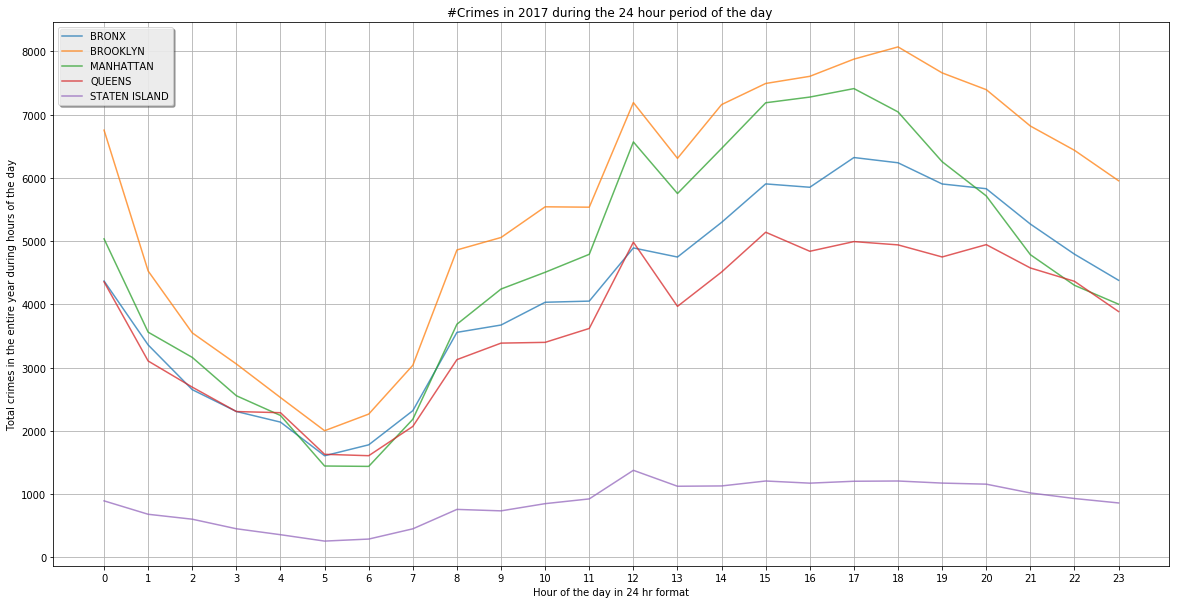

In [40]:
plt.figure(figsize=(20,10))
xvalues = range(0,24,1)


plt.xlabel('Hour of the day in 24 hr format')
xticks = np.arange(0,24,1)
plt.xticks(xticks)
plt.ylabel('Total crimes in the entire year during hours of the day')
plt.title('#Crimes in 2017 during the 24 hour period of the day ')

plt.grid(True)


for aBoro in BORO_IN_QUESTION:
    # dataframe segmentation - BORO-WISE
    boro_df = df.loc[df['BORO_NM'] == aBoro , ['RPT_DT','CMPLNT_FR_DT','CMPLNT_FR_TM','JURIS_DESC', 'BORO_NM']]
    print(boro_df.dtypes)
    boro_ts_df = pd.DataFrame(pd.DatetimeIndex(boro_df['CMPLNT_FR_DT'] + ' ' + boro_df['CMPLNT_FR_TM'],
                                             format='%m/%d/%Y %H:%M:%S'), dtype='datetime64').sort_index(ascending=False, 
                                                                                                         kind='quicksort')
    boro_ts_df['hourly'] = pd.to_datetime(boro_ts_df[0], format='%Y-%m-%d %H:%M:%S') 
    boro_ts_df.set_index(boro_ts_df['hourly'],inplace=True)
    ## add a count of 1 for each timestamp to aggregate the number of crimes occuring by the hour
    boro_ts_df['numCases']=1
    # Crimes by the hour in a Boro over entire of 2017
    df_boro_2017=boro_ts_df.groupby(boro_ts_df.index.map(lambda t: t.hour))
    crimes_by_hour = list()
    for i in range(0,24):
        crimes_by_hour.append(df_boro_2017.count()['numCases'][i])

    plt.plot(xvalues,crimes_by_hour, label=aBoro,  alpha=0.75)
    legend = plt.legend(loc='upper left', shadow=True) #, fontsize='x-large'
  
plt.savefig("Crimes in 2017 during the 24 hour period.png", dpi=300)
plt.show()